**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [107]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [108]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [109]:
model = ExchangeEconomyClass()

Opgave 1

In [110]:
import numpy as np

ua = model.utility_A(model.par.w1A, model.par.w2A)
ub = model.utility_B(1-model.par.w1A, 1-model.par.w2A)
N = 75

list=[]

for x1A in np.linspace(0, 1, N+1):
    for x2A in np.linspace(0, 1, N+1):
        x1B = 1 - x1A
        x2B = 1 - x2A
        
        utilia = model.utility_A(x1A, x2A)
        utilib = model.utility_B(x1B, x2B)
        if utilia >= ua and utilib >= ub:
            list.append((x1A,x2A))

print(list)
x, y = zip(*list)

[(0.08, 0.9600000000000001), (0.09333333333333334, 0.88), (0.09333333333333334, 0.8933333333333334), (0.09333333333333334, 0.9066666666666667), (0.09333333333333334, 0.92), (0.09333333333333334, 0.9333333333333333), (0.09333333333333334, 0.9466666666666668), (0.09333333333333334, 0.9600000000000001), (0.10666666666666667, 0.8266666666666668), (0.10666666666666667, 0.8400000000000001), (0.10666666666666667, 0.8533333333333334), (0.10666666666666667, 0.8666666666666667), (0.10666666666666667, 0.88), (0.10666666666666667, 0.8933333333333334), (0.10666666666666667, 0.9066666666666667), (0.10666666666666667, 0.92), (0.10666666666666667, 0.9333333333333333), (0.10666666666666667, 0.9466666666666668), (0.10666666666666667, 0.9600000000000001), (0.12000000000000001, 0.7866666666666667), (0.12000000000000001, 0.8), (0.12000000000000001, 0.8133333333333334), (0.12000000000000001, 0.8266666666666668), (0.12000000000000001, 0.8400000000000001), (0.12000000000000001, 0.8533333333333334), (0.1200000

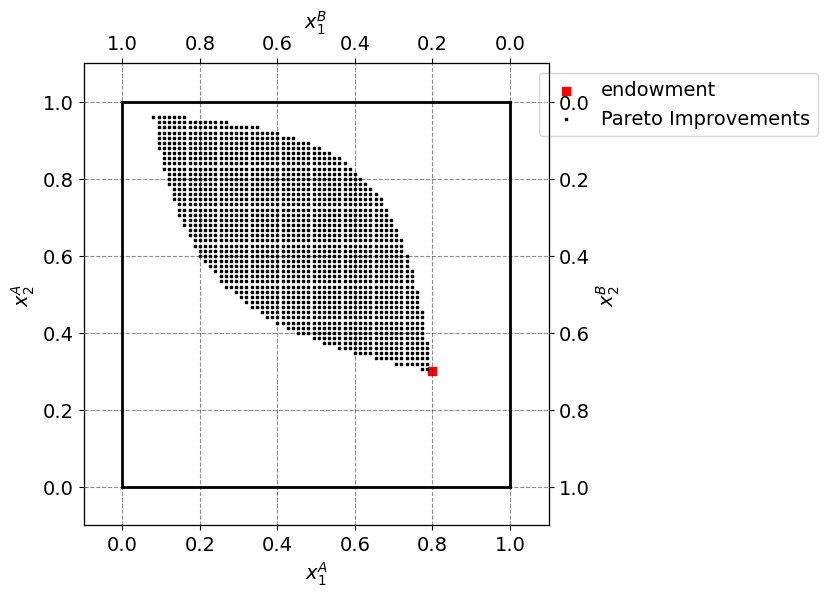

In [111]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')
ax_A.scatter(x,y,marker='s',color='black',label='Pareto Improvements', s=0.8)

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

        eps1      eps2
0   0.533333 -0.266667
1   0.475949 -0.250667
2   0.424096 -0.234667
3   0.377011 -0.218667
4   0.334066 -0.202667
..       ...       ...
71 -0.363231  0.869333
72 -0.365840  0.885333
73 -0.368392  0.901333
74 -0.370889  0.917333
75 -0.373333  0.933333

[76 rows x 2 columns]


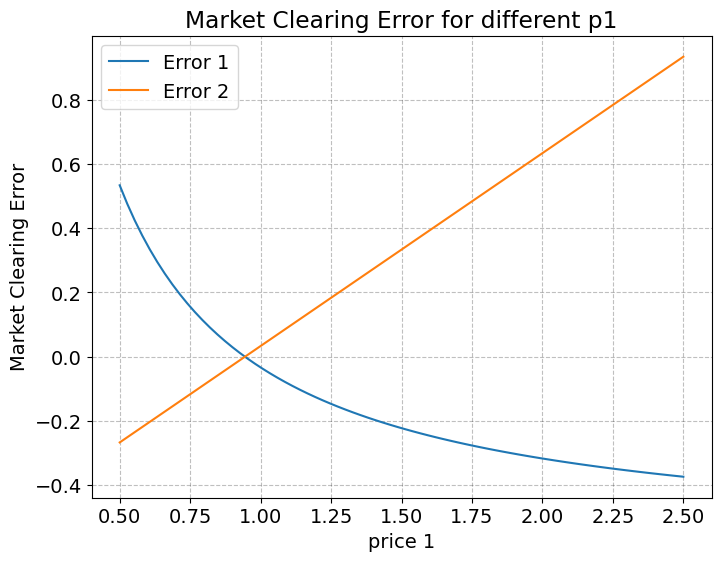

In [165]:
# 1. We start define p1 as:
p1 = [(0.5 + 2*i/75) for i in range(76)]

# 2. We calculate the errors:
errors = [model.check_market_clearing(x) for x in p1]
eps1 = [x[0] for x in errors]
eps2 = [x[1] for x in errors]

# 3. Pandas is imported:
import pandas as pd

# 4. Creating dataframe:
df = pd.DataFrame(errors, columns=['eps1', 'eps2'])
print(df)

# Plotting the total market clearing error against p1 values
plt.figure(figsize=(8, 6))
plt.plot(p1, eps1, label='Error 1')
plt.plot(p1, eps2, label='Error 2')
plt.xlabel('price 1')
plt.ylabel('Market Clearing Error')
plt.title('Market Clearing Error for different p1')
plt.legend()
plt.grid(True)
plt.show()


In [172]:
# 1. EPS close to zero
eps_zero = np.abs(eps1).argmin()

# 2. Getting the price where eps1 is closest to zero
market_clearing_price = p1[eps_zero]


# 4. Print the market clearing price
print(f"Market clearing when p1 is {market_clearing_price:.5f} and p2 is 1.")

Market clearing when p1 is 0.95333 and p2 is 1.


Opgave 4A